In [1]:
import numpy as np

In [164]:
#Faremos a função de ativação degrau binário
def binaryStep(x):
    if x >= 0:
        return 1
    else:
        return -1

class perceptron:
    def __init__(self, weight_number):
        self.weights = np.random.normal(0,0.1, size= weight_number)
        self.bias = 0.0
        self.guess_res = 0.0
    
    def guess(self, inputs):
        if len(inputs) != len(self.weights):
            raise ValueError(f"Número de entradas {len(inputs)} diferente do número de pesos {len(self.weights)}")
        self.guess_res = sum([inputs[i] * self.weights[i] for i in range(len(inputs))]) + self.bias
        ## O produto de arrays da linha acima é também conhecido como PRODUTO ESCALAR
        ## e o python já tem uma função para isso, o np.dot!! Portanto poderíamos fazer:
        ## self.guess_res = np.dot(self.weights, inputs) + self.bias
        self.guess_res = binaryStep(self.guess_res)
        return self.guess_res

In [175]:
#O tamanho do array de inputs deve ser igual ao número de pesos (weight_number) passado na criação do perceptron!!
p = perceptron(17)
p.guess([10, 5, -1, 0.5, 3, 6, 8, -2, 4, 7, 9, 11, -3, 12, 13, 14, 15])
print(p.guess_res)

1


In [191]:
import random
label = 0
coord = []
n = 100
nodes = [[random.uniform(0,1), random.uniform(0,1), label] for _ in range(n)]
for node in nodes:
    if(node[0] > node[1]):
        node[2] = 1
    else:
        node[2] = -1
    
print(nodes)

[[0.8689820411216332, 0.2812374867294488, 1], [0.894125903816021, 0.6954815485454957, 1], [0.8038886625718663, 0.5471430001239628, 1], [0.5476114479283269, 0.9206186561595537, -1], [0.4443219677685808, 0.05027829977757159, 1], [0.16018241470962924, 0.8186463954263926, -1], [0.9236701570147599, 0.9695435607702088, -1], [0.9661237663141717, 0.6469285448686353, 1], [0.07920150075267596, 0.20389460093301437, -1], [0.5315601440304887, 0.3413525773773205, 1], [0.9046236253951087, 0.2126913679899518, 1], [0.2651591111804109, 0.5703812725759249, -1], [0.001852312310675397, 0.8534704115527166, -1], [0.030740845450776044, 0.793032164400255, -1], [0.430882734851888, 0.8615065325645078, -1], [0.1259415813283773, 0.6552959210606181, -1], [0.07254138411549249, 0.5641539716359514, -1], [0.4410437949889797, 0.8714660249833294, -1], [0.27499335415606285, 0.09210481836605933, 1], [0.803026218447044, 0.7991084216679095, 1], [0.38139540881469935, 0.5191598964276616, -1], [0.6284262662424448, 0.95892374190

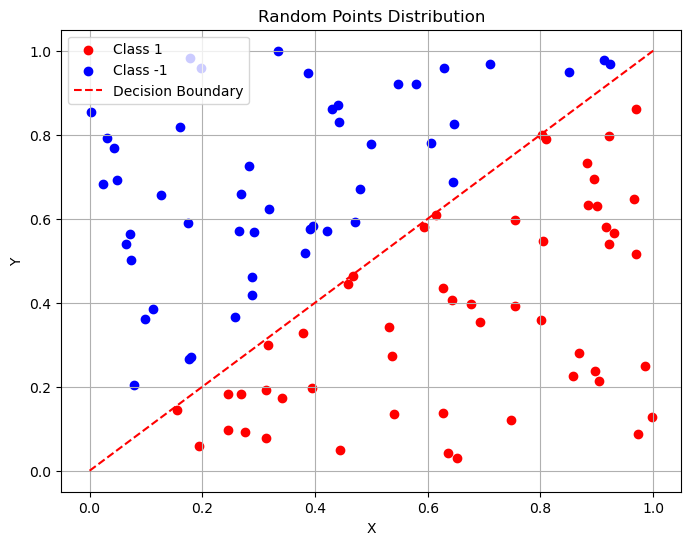

In [206]:
import matplotlib.pyplot as plt
import numpy as np

# Convert nodes to numpy array for easier manipulation
nodes_array = np.array(nodes)

# Split points based on label (nodes_array[:, 2] gets all labels)
red_points = nodes_array[nodes_array[:, 2] == 1]
blue_points = nodes_array[nodes_array[:, 2] == -1]

# Create plot
plt.figure(figsize=(8, 6))
plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=1, label='Class 1')
plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=1, label='Class -1')

# Add 45-degree line
plt.plot([0, 1], [0, 1], 'r--', label='Decision Boundary')

# Customize plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Points Distribution')
plt.grid(True)
plt.legend()
plt.show()